# SF Salaries Analysis

First we will import libraries and read in the csv file

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


sal = pd.read_csv('Salaries.csv', low_memory=False)

Let's take a quick look at the data

In [2]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Let's do some analysis on the columns see how many unique values are in each

In [4]:
uniqCounts = sal.apply(pd.Series.nunique)
print(uniqCounts)

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109724
OvertimePay          66162
OtherPay             84243
Benefits             98647
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64


Here we see there's no information in the 'Notes' column, and everyone belongs to the same agency. So if the number of unique items in a column is <= 1 then let's drop it.

In [5]:
for ind, val in uniqCounts.iteritems():
    if val <= 1:
        print(ind)
        sal.drop(ind, axis=1, inplace=True)

Notes
Agency


So we end up dropping the 'Notes' and 'Agency' columns.
Let's now examine pay over time. We will plot a histogram of Total Pay by year.

[ 36159.  36766.  37606.  38123.]


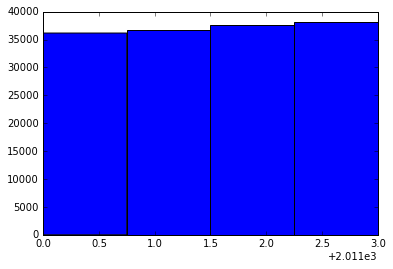

In [10]:
hist = plt.hist(sal['Year'].dropna(), bins=uniqCounts['Year'])
print(hist[0])

Now we'll plot the distribution of salaries by year

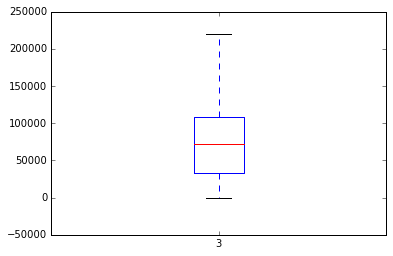

In [59]:
uniqYears = sal['Year'].unique()

fig, axes = plt.subplots()
for i in range(uniqYears.size):
    axes.boxplot(sal['TotalPay'][sal['Year'] == uniqYears[i]].values, \
               positions=[i+.5], \
               showfliers=False) 

axes.set_xticks([-.5, 1, 1.5, 2])
axes.set_xticklabels(uniqYears)

In [28]:
for i in range(uniqYears.size):
    print(i)

0
1
2
3
